<a href="https://colab.research.google.com/github/mukund2124/CNN-cat-dogs-classification/blob/main/dogcatfight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d salader/dogs-vs-cats

cp: cannot stat 'kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:13<00:00, 51.2MB/s]
100% 1.06G/1.06G [00:13<00:00, 84.0MB/s]


In [2]:
import zipfile
zip_data = zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_data.extractall('/content/')
zip_data.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

import matplotlib.pyplot as plt
import cv2

In [ ]:
# Generators

train_ds = tf.keras.utils.image_dataset_from_directory(
              directory='/content/train',
              labels='inferred',
              label_mode='int',
              batch_size=32,
              image_size=(256, 256)
          )


test_ds = tf.keras.utils.image_dataset_from_directory(
              directory='/content/test',
              labels='inferred',
              label_mode='int',
              batch_size=32,
              image_size=(256, 256)
          )

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalization

def scale_down_px(image, label):

  image = tf.cast(image/255, tf.float32)

  return image, label

In [ ]:
from keras import applications
from tensorflow.keras.applications import VGG16
from keras.layers import BatchNormalization, Dropout
# Define model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(256, 256, 3))
base_model.trainable = False  # Freeze pre-trained layers

model = Sequential()
model.add(base_model)
model.add(Conv2D(32, (3,3), padding = 'valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), padding = 'valid'))

model.add(Conv2D(64, (3,3), padding = 'same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(128, (3,3), padding = 'same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(256, (3,3), padding = 'same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(512, (3,3), padding = 'same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), padding = 'same'))


model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
# Final output layer with softmax activation for multi-class classification, sigmoid for binary :)
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_ds,  validation_data = test_ds, epochs=10)

58889256/58889256 [==============================] - 3s 0us/step
Epoch 1/10
161/625 [======>.......................] - ETA: 2:52:27 - loss: 0.1799 - accuracy: 0.9260

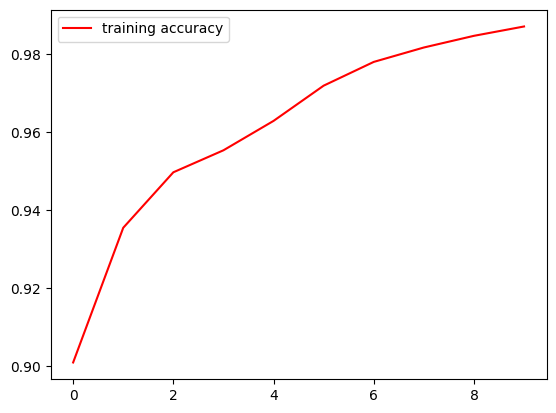

In [ ]:
plt.plot(history.history['accuracy'], color='r', label='training accuracy')
plt.legend()
plt.show()

In [ ]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 conv2d_95 (Conv2D)          (None, 6, 6, 32)          147488    
                                                                 
 batch_normalization_60 (Ba  (None, 6, 6, 32)          128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_94 (MaxPooli  (None, 3, 3, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_96 (Conv2D)          (None, 3, 3, 64)          18496     
                                                                 
 batch_normalization_61 (Ba  (None, 3, 3, 64)        

In [ ]:
test_img = cv2.resize(test_img, (256, 256))

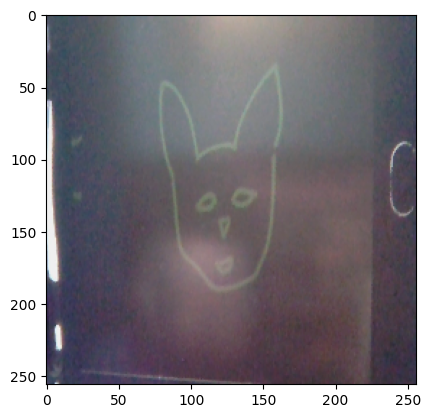

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(256, 256, 3)

In [ ]:
test_input = test_img.reshape(1, 256, 256, 3)

In [ ]:
test_input


array([[[[ 87,  80,  95],
         [ 86,  81,  96],
         [ 78,  81,  96],
         ...,
         [ 73,  82,  96],
         [ 70,  86, 103],
         [ 46,  88, 100]],

        [[ 81,  79,  95],
         [ 80,  80,  96],
         [ 77,  83,  95],
         ...,
         [ 66,  82,  95],
         [ 67,  83,  99],
         [ 55,  86,  97]],

        [[ 77,  81,  98],
         [ 76,  82,  97],
         [ 75,  85,  95],
         ...,
         [ 66,  80,  94],
         [ 66,  82,  98],
         [ 59,  87,  97]],

        ...,

        [[ 76,  72,  98],
         [ 65,  70,  95],
         [ 61,  72,  96],
         ...,
         [ 57,  57,  71],
         [ 55,  53,  72],
         [ 55,  51,  70]],

        [[ 81,  71,  98],
         [ 72,  71,  97],
         [ 62,  69,  96],
         ...,
         [ 61,  55,  72],
         [ 58,  54,  71],
         [ 51,  49,  68]],

        [[ 84,  70,  98],
         [ 73,  70,  96],
         [ 65,  69,  97],
         ...,
         [ 66,  56,  73],
        

In [ ]:
output = model.predict(test_input)[0][0]
print(f'Output is: {output} \n')

if output < 0.5:
  print('This is a Cat')
else:
  print('This is a Dog')

1/1 [==============================] - 0s 19ms/step
Output is: 1.0 

This is a Dog
